https://www.geeksforgeeks.org/ml-logistic-regression-using-python/

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns', None)

In [5]:
df=pd.read_csv("../Data/New_Prod_Purchase.csv")

In [6]:
df.sample(4)

,User ID,Gender,Age,EstimatedSalary,Purchased
43,15792008,Male,30,15000,0
341,15776844,Male,35,75000,0
320,15774872,Female,52,138000,1
264,15600379,Male,48,90000,1


In [7]:
df.shape, df['User ID'].nunique()

((400, 5), 400)

In [16]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

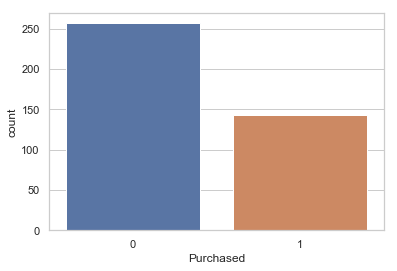

In [24]:
sns.countplot(x='Purchased', data=df)

Text(0, 0.5, 'Frequency of Purchase')

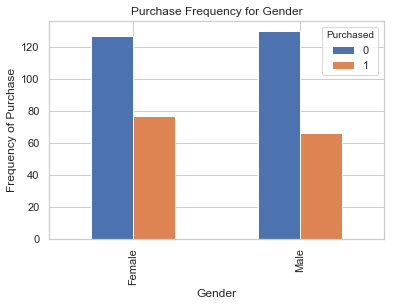

In [27]:
%matplotlib inline
pd.crosstab(df.Gender,df.Purchased).plot(kind='bar')

plt.title('Purchase Frequency for Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Purchase')

Text(0, 0.5, 'Proportion of Customers')

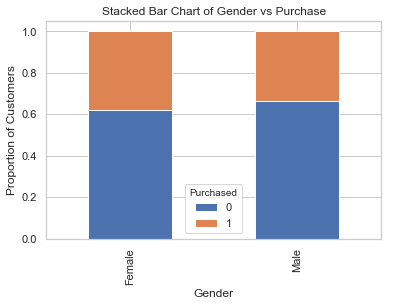

In [30]:
table=pd.crosstab(df.Gender,df.Purchased)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs Purchase')
plt.ylabel('Proportion of Customers')



In [35]:
y=pd.DataFrame()
X = df[['Age', 'EstimatedSalary']].copy()
y['y'] = df['Purchased'].copy()

Accuracy :  0.6583333333333333


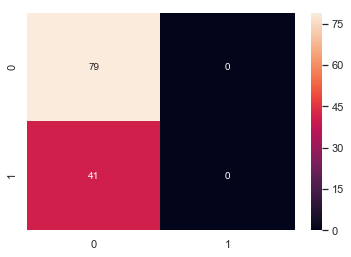

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train.values.ravel()) 
y_pred = classifier.predict(X_test) 
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot=True)
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

# Feature Scaling

__Age and Estimated Salary values lie in different ranges.__   
If we don’t scale the features then Estimated Salary feature will dominate Age feature when the model finds the nearest neighbor to a data point in data space.

In [ ]:
y=pd.DataFrame()
X = df[['Age', 'EstimatedSalary']].copy()
y['y'] = df['Purchased'].copy()

In [52]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
X_sc = sc_x.fit_transform(X)  

In [55]:
X_sc=pd.DataFrame(X_sc)

Accuracy :  0.8666666666666667


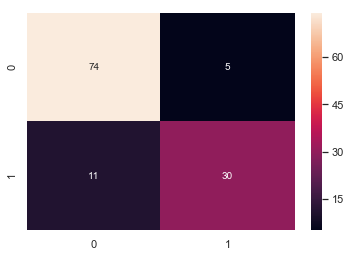

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=0)
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train.values.ravel()) 
y_pred = classifier.predict(X_test) 
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot=True)
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

# Feature Scaling + Gender Dummy Coding

In [63]:
X_sc_Gen=X_sc.copy()
X_sc_Gen['Gender']=df['Gender']
X_sc_Gen.columns=['Age', 'Salary', 'Gender']

In [64]:
X_sc_Gen.sample(3)

,Age,Salary,Gender
174,-0.349100,0.066291,Female
164,-0.444614,-0.021803,Female
5,-1.017692,-0.344817,Male


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12535cac8>]],
      dtype=object)

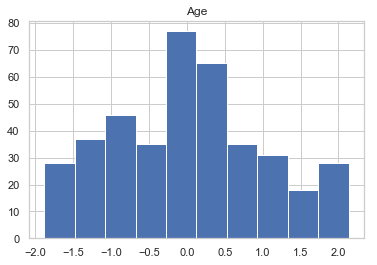

In [65]:
X_sc_Gen.hist('Age')

In [69]:
#pd.get_dummies(X_sc_Gen['Gender'])
X_sc_Gen=X_sc_Gen.join(pd.get_dummies(X_sc_Gen['Gender']))
X_sc_Gen.sample(4)

In [71]:
del X_sc_Gen['Gender']

Accuracy :  0.8916666666666667


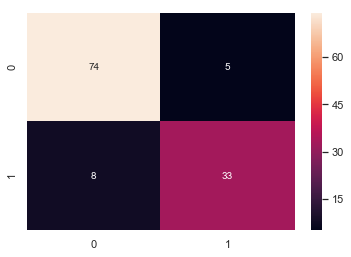

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 

X_train, X_test, y_train, y_test = train_test_split(X_sc_Gen, y, test_size=0.3, random_state=0)
#classifier = LogisticRegression( solver='liblinear')
#classifier = LogisticRegression( solver='lbfgs')
#classifier = LogisticRegression( solver='newton-cg')
#classifier = LogisticRegression( solver='sag')
classifier = LogisticRegression( solver='saga')

classifier.fit(X_train, y_train.values.ravel()) 
y_pred = classifier.predict(X_test) 
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot=True)
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 